Завдання 1. Побудувати модель для роботи з текстом. Перевірити її
роботу.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=901cbc796bbc0c0241f1ac252b26be406d1934b18dcedf570810f89a200a9865
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 43.8 MB/s eta 0:00:00
Кількість символів:  22908
Кількість токенів:  22908
Кількість унікальних токенів:  7636
Найбільш уживані токени:  [(('еней',), 350), (('бути',), 282), (('ти',), 194), (('я',), 187), (('турна',), 151), (('ода',), 150), (('свій',), 134),

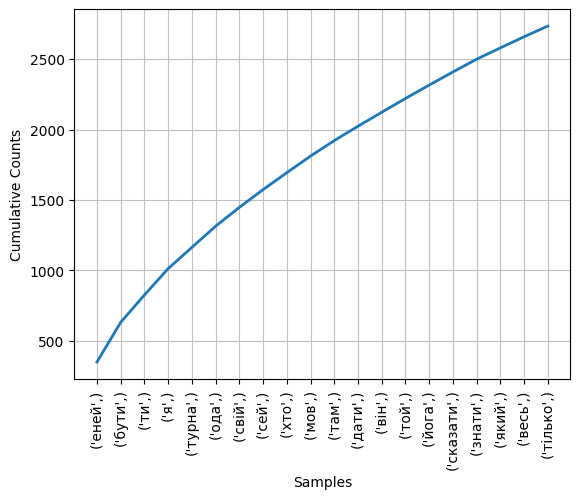

{'epoch': 9, 'loss': 8.494357109069824}
ти знаєш він який суціга голоду фаналевій моря не вбіг же запасці послі і бо


In [1]:
import requests
from bs4 import BeautifulSoup
import re
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import nltk

url = 'https://www.ukrlib.com.ua/books/getfile.php?tid=1052&type=6'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
poem_text = soup.body.get_text()

# Видалити всі теги з тексту
poem_text = re.sub(r'<.*?>', '', poem_text)

# Видалити всі коментарі, які починаються після 'КОМЕНТАР ДО'
poem_text = poem_text.split('КОМЕНТАР ДО', 1)[0]

# Токенізація тексту
poem_text=re.sub(r"""[0-9]""", r" ", poem_text)
poem_text=re.sub(r"""[^А-ЩЬЮЯҐЄІЇа-щьюяґєії'\n]""", ' ', poem_text)
rows=poem_text.lower().split("\n")
rows=[row for row in rows if row]
rows_words = [[word for word in row.split(" ") if word] for row in rows]
words = [word for words in rows_words for word in words if word]

!pip install pymorphy2
!pip install pymorphy2-dicts-uk
import pandas as pd
import pymorphy2

stop_words = "з, у, як, що, тут, щоб, так, то, по, та, а, або, аби, аж, але, аналогічно, б, багато, без, більш, більше, бо, буває, було, бути, в, вам, вас, весь, вже, від, він, вона, вони, все, всі, всіх, вся, втім, г, геть, говорив, говорить, д, да, давно, далеко, дарма, де, де-неде, дехто, дещо, дійсно, для, до, довго, доводиться, досить, доцільно, дуже, е, є, ж, життя, за, звідки, звідси, звісно, здається, зі, знову, зовсім, і, із, іноді, ї, її, їм, їх, їхній, їхня, їхнє, й, к, каже, кілька, коли, колись, кому, конкретно, краще, крім, куди, ледве, ледь, лише, м, має, майже, мало, мене, мені, менш, ми, мимоволі, минулого, минулому, міг, між,мій, мільйонів, мною, могти, моє, мої, може, можливо, море, моя, на, навіть, навіщо, навіщось, над, найбільш, нам, нами, нарешті, нас, наш, наша, наше, наші, не, нею, ні, ніби, ніж, ніякий, нічого, ну, об, обоє, от, отже,оце, оцей, оцю, особливо, особливості, особливою, ось, перед, перш, під, підсумовуючи, після, поки, пора, порівняно, поряд, порядку, початку, подруге, поперше, правда, право, прекрасно, при, причому, про, просто, проте, після,ради, раніше, раз, разом, років, року, році, розмірковує, рік, с, сам, сама, саме, самим, самими, самі, самого, самому, себе, собі"
stop_words = set(stop_words.split(", "))
morph = pymorphy2.MorphAnalyzer(lang="uk")
series = pd.Series(words)
series = [s for s in series if s not in stop_words]
series = [morph.parse(s)[0].normal_form for s in series]
print ('Кількість символів: ', len(series))

series=nltk.ngrams(series,1)
series=nltk.FreqDist(series)
print('Кількість токенів: ', series.N())
print('Кількість унікальних токенів: ', series.B())
print('Найбільш уживані токени: ', series.most_common(20))

series.plot(20, cumulative = True)
class LanguageModelDataset(torch.utils.data.Dataset):
 def __init__(
     self,
     words,
     sequence_length,
 ):
     self.sequence_length = sequence_length
     self.words = words
     self.uniq_words = self.get_uniq_words()
     self.index_to_word = {index: word for index, word in enumerate(self.uniq_words)}
     self.word_to_index = {word: index for index, word in enumerate(self.uniq_words)}
     self.words_indexes = [self.word_to_index[w] for w in self.words]
 def get_uniq_words(self):
     word_counts = Counter(self.words)
     return sorted(word_counts, key=word_counts.get, reverse=True)
 def __len__(self):
    return len(self.words_indexes) - self.sequence_length
 def __getitem__(self, index):
    return (torch.tensor(self.words_indexes[index:index+self.sequence_length]),
            torch.tensor(self.words_indexes[index+1:index+self.sequence_length+1]), )
class LanguageModel(nn.Module):
  def __init__(self, vocab_size):
       super(LanguageModel, self).__init__()
       self.lstm_size = 128
       self.embedding_dim = 128
       self.num_layers = 3
       self.embedding = nn.Embedding(
       num_embeddings=vocab_size,
       embedding_dim=self.embedding_dim,
       )
       self.lstm = nn.LSTM(
       input_size=self.lstm_size,
       hidden_size=self.lstm_size,
       num_layers=self.num_layers,
       dropout=0.2,
       )
       self.fc = nn.Linear(self.lstm_size, vocab_size)
  def forward(self, x, prev_state):
      embed = self.embedding(x)
      output, state = self.lstm(embed, prev_state)
      logits = self.fc(output)
      return logits, state
  def init_state(self, sequence_length):
     return (torch.zeros(self.num_layers, sequence_length, self.lstm_size),torch.zeros(self.num_layers, sequence_length, self.lstm_size))

# Set the hyperparameters
sequence_length = 20
learning_rate = 0.1
batch_size = 2
n_epochs = 10
words = words[:2500]

# Create the PyTorch dataset and rows_words loader
dataset = LanguageModelDataset(words, sequence_length)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create the PyTorch model and optimizer
model = LanguageModel(len(dataset.uniq_words))
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
model.train()
for epoch in range(n_epochs):
    state_h, state_c = model.init_state(sequence_length)
    loss = None
    for batch, (x, y) in enumerate(data_loader):
        optimizer.zero_grad()
        y_pred, (state_h, state_c) = model(x, (state_h, state_c))
        loss = criterion(y_pred.transpose(1, 2), y)
        state_h = state_h.detach()
        state_c = state_c.detach()
        loss.backward()
        optimizer.step()
print({ 'epoch': epoch, 'loss': loss.item() })
import numpy as np
def predict(dataset, model, text, next_words=10):
    model.eval()
    words = text.split(' ')
    state_h, state_c = model.init_state(len(words))
    for i in range(0, next_words):
      x = torch.tensor([[dataset.word_to_index[w] for w in words[i:]]])
      y_pred, (state_h, state_c) = model(x, (state_h, state_c))
      last_word_logits = y_pred[0][-1]
      p = torch.nn.functional.softmax(last_word_logits, dim=0).detach().numpy()
      word_index = np.random.choice(len(last_word_logits), p=p)
      words.append(dataset.index_to_word[word_index])
    return words
print(" ".join(predict(dataset, model, text='ти знаєш він який суціга')))
